In [ ]:
200_000

200000

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / 'images' / 'classification'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  
  plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False) # to get data as numpy arrays

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist.data, mnist.target

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X.shape

(70000, 784)

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y.shape

(70000,)

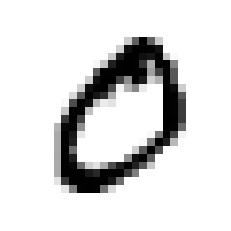

0


In [13]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

sample = X[1]
plot_digit(sample)
plt.show()
print(y[1])

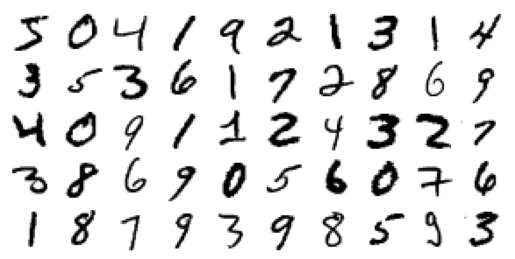

In [14]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:50]):
  plt.subplot(10, 10, idx+1)
  plot_digit(image_data)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classification

In [ ]:
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([sample])

array([False])

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

### Cross-Validation system

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=False)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold  = X_train[test_index]
  y_test_fold  = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred =clone_clf.predict(X_test_fold)
  n_pred = sum(y_pred == y_test_fold)
  print(n_pred / len(y_pred))

0.95035
0.96035
0.9604


## Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Percision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## The Precision/Recall Trade-off

In [ ]:
y_scores = sgd_clf.decision_function([sample])
y_scores

array([-5897.37359354])

In [ ]:
threshold = 0

In [ ]:
y_instance = (y_scores > threshold)
y_instance

array([False])

In [ ]:
threshold== 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

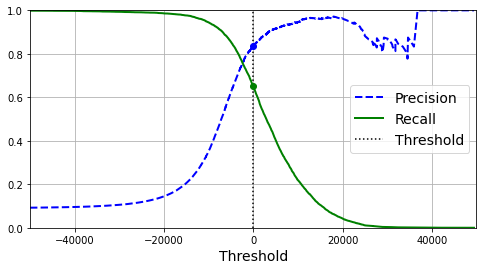

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='Threshold')

idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], 'bo')
plt.plot(thresholds[idx], recalls[idx], 'go')
plt.axis([-50_000, 50_000, 0, 1])
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Threshold')
plt.show()

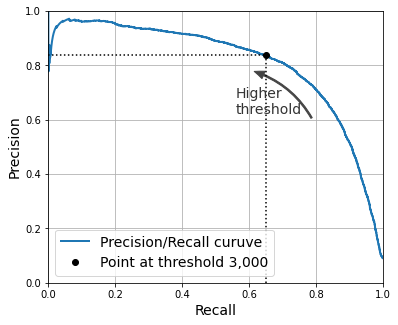

In [ ]:
import matplotlib.patches as patches

plt.figure(figsize=(6,5))

plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall curuve')

plt.plot([recalls[idx], recalls[idx]], [0, precisions[idx]], 'k:')
plt.plot([0, recalls[idx]], [precisions[idx], precisions[idx]], 'k:')
plt.plot([recalls[idx]], [precisions[idx]], 'ko', label='Point at threshold 3,000')

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle='arc3, rad=.2',
    arrowstyle='Simple, tail_width=1.5, head_width=8, head_length=10',
    color='#444444'
))
plt.text(0.56, 0.62, 'Higher\nthreshold',color='#333333')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower left')

plt.show()

In [ ]:
idx_4_90_precision = (precisions >= 0.9).argmax()
threshold_4_90_precision = thresholds[idx_4_90_precision]

In [ ]:
threshold_4_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= threshold_4_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC curve

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

<ipython-input-47-0de6bbd49911>:21: MatplotlibDeprecationWarning: Unrecognized location 'lower rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='lower rigth', fontsize=13)


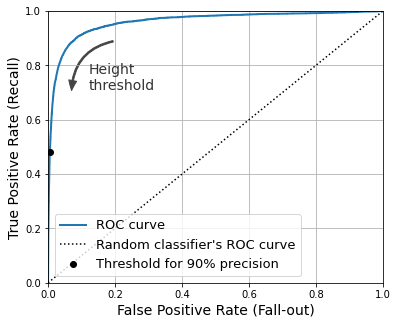

In [ ]:
idx_4_threshold_90 = (thresholds <= threshold_4_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_4_threshold_90], fpr[idx_4_threshold_90]

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], 'ko', label='Threshold for 90% precision')

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.7),
    connectionstyle='arc3,rad=.4',
    arrowstyle='Simple, tail_width=1.5, head_width=8, head_length=10',
    color='#444444'
))

plt.text(0.12, 0.71, 'Height\nthreshold', color='#333333')
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc='lower rigth', fontsize=13)

plt.show()

### ROC_AUC

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Implement RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
idx_50_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{y_train_5[idx_50_60].sum()/idx_50_60.sum():.1%}")

94.0%


In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

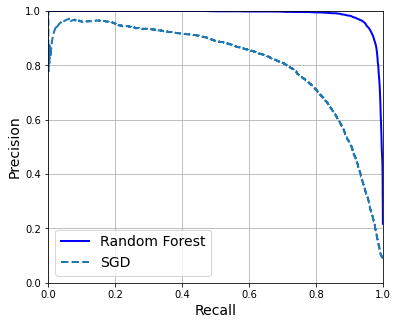

In [ ]:
plt.figure(figsize=(6,5))

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower left')

plt.show()

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# MultiClass Classification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([sample])

array(['0'], dtype=object)

In [ ]:
sample_digit_scores = svm_clf.decision_function([sample])
sample_digit_scores

array([[ 9.30765245, -0.2943051 ,  6.13755952,  7.21456615,  0.71381532,
         8.27697993,  3.79579313,  1.76540488,  2.76647229,  5.11166344]])

In [ ]:
class_id = sample_digit_scores.argmax()
class_id

0

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'0'

In [ ]:
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

NameError: ignored

## Manually set OvO or OvR

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([sample])

array(['0'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([sample])

array(['0'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([sample]).round()

array([[ 14391., -36919.,  -9811.,  -8055., -21825., -11314., -23649.,
        -15987.,  -3799., -10635.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

# Error Analysis

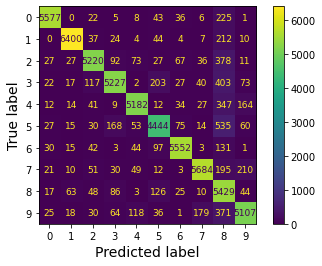

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
# plt.figure(figsize=(20, 20))
plt.rc('font', size=9) 
plt.show()

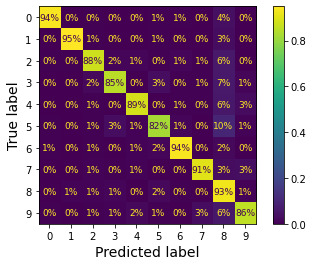

<Figure size 1440x1440 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format='.0%')
plt.rc('font', size=9) 
plt.show()

<Figure size 1440x1440 with 0 Axes>

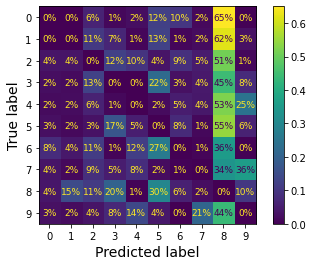

In [ ]:
plt.figure(figsize=(20, 20))
plt.rc('font', size=9) 
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize='true', values_format='.0%')
plt.show()

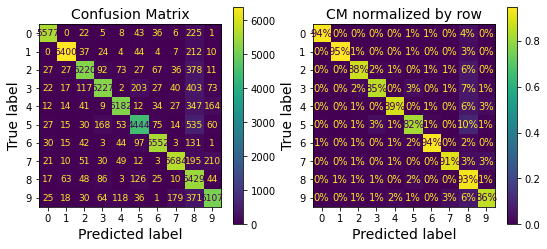

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title('Confusion Matrix')
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1], normalize='true', values_format='.0%')

axs[1].set_title('CM normalized by row')

plt.show()

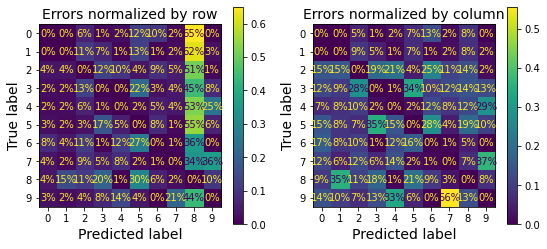

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], sample_weight=sample_weight,
                                        normalize='true', values_format='.0%')
axs[0].set_title('Errors normalized by row')

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1], sample_weight=sample_weight,
                                       normalize='pred', values_format='.0%')
axs[1].set_title('Errors normalized by column')

plt.show()
plt.rc('font', size=14)

In [ ]:
cl_a, cl_b = '5', '8'
# x_aa = X_train[]
x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

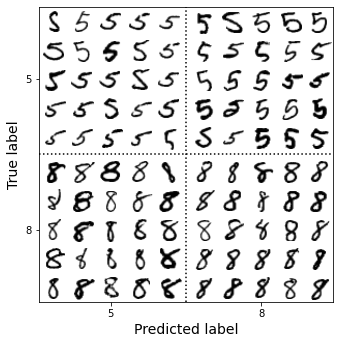

In [ ]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))

for images, (label_col, label_row) in [(x_ba, (0, 0)), (x_bb, (1, 0)), (x_aa, (0, 1)), (x_ab, (1, 1))]:
  for idx, image_data in enumerate(images[:size*size]):
    x = idx % size + label_col * (size + pad)
    y = idx // size + label_row * (size + pad)
    plt.imshow(image_data.reshape(28, 28), cmap='binary', extent=(x, x+1, y, y+1))

plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [ ]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd   = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([X[0]])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9778357403921755

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([X[0]])

array([[0., 1.]])

# Multioutput Classification

In [ ]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

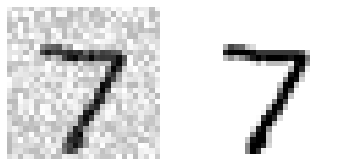

In [ ]:
plt.subplot(121)
plot_digit(X_test_mod[0])
plt.subplot(122)
plot_digit(y_test_mod[0])

plt.show()

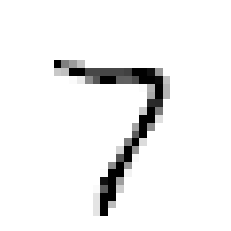

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

# Exercises

## 1. Reach out 97% accuracy on MNIST dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
X_test_scaled = scaler.transform(X_test.astype('float64'))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [ ]:
knn_new_clf =  KNeighborsClassifier(**grid_search.best_params_)
knn_new_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
knn_new_clf.score(X_test_scaled, y_test)

0.9489

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# preprocessing = make_pipeline(StandardScaler())
# full_pipeline = Pipeline([
#     ('preprocessing', StandardScaler()),
#     ('knn_clf', KNeighborsClassifier()),
# ])
knn_clf = KNeighborsClassifier()
param_grid = [
    {'weights': ['distance', 'uniform'],
     'n_neighbors': [3, 4, 5, 10, 15, 20]}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 10, 15, 20],
                          'weights': ['distance', 'uniform']}])

In [33]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [34]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [35]:
grid_search.best_score_

0.9441999999999998

In [36]:
best_knn_clf = KNeighborsClassifier(**grid_search.best_params_)
best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [37]:
best_knn_clf.score(X_test, y_test)

0.9714

## 2. Data Augmentation

In [28]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

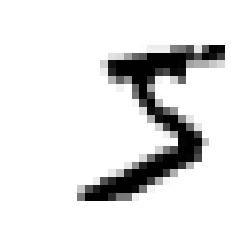

In [23]:
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift

def plot_image(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

def shift_image(image_data, shift_data=[0, 0]):
  return shift(image_data.reshape(28, 28), shift_data, cval=0).reshape([-1])

plot_image(shift_image(X[0], [0, 5]))

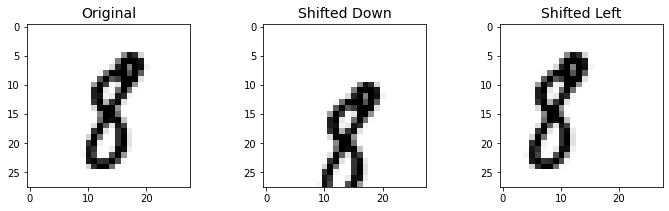

In [26]:
random_sample = X[300]
shifted_down_sample = shift_image(random_sample, [5, 0])
shifted_left_sample = shift_image(random_sample, [0, -5])
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title('Original')
plt.imshow(random_sample.reshape(28, 28), interpolation='nearest', cmap='Greys') # https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

plt.subplot(132)
plt.title('Shifted Down')
plt.imshow(shifted_down_sample.reshape(28, 28), interpolation='nearest', cmap='Greys',)

plt.subplot(133)
plt.title('Shifted Left')
plt.imshow(shifted_left_sample.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.show()

In [29]:
X_train_augmented = [image_data for image_data in X_train]
y_train_augmented = [label for label in y_train]

for shift_amount in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
  for image_data, label in zip(X_train, y_train):
    new_sample = shift_image(image_data, shift_amount)
    X_train_augmented.append(new_sample)
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [30]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]


In [38]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [39]:
knn_clf.score(X_test, y_test)

0.9763